In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sqlalchemy import create_engine

In [4]:
def get_db_non_tok_data(conn):
    data = pd.read_sql_table('crw_data', conn)
    return data

def get_db_tok_data(conn):
    data = pd.read_sql_table('tokenized_data', conn)
    return data

In [6]:
data = get_db_non_tok_data(conn)
data_tok = get_db_tok_data(conn)

In [6]:
conn_server = mysql_conn_server()
data = get_db_non_tok_data(conn_server)
data_tok = get_db_tok_data(conn_server)

In [7]:
data.head()

,NO,TITLE,DATE,CONTENT,CATEGORY,BOARD
0,1,바다찌낚 미야케지마 조행기 1~7 [스압],2019-03-27,- 바다찌낚 미야케지마 조행기 1내용은 짧게...편의상 반말마이로그 사망이라 나눠서...,1,0
1,2,나도 왜 여기 올리는지 모르는 결혼식 후기,2019-03-26,예전부터 남들 다 하는 똑같은 결혼식에서 하는게 싫어서 색다른 분위기의 예식장을 찾...,1,0
2,3,"DUMMY [초스압, 데이터주의]",2019-03-26,3년전에 그렸던 만화예요.출판형식으로 작업해서 웹으로 볼땐 느낌이 많이 다르네용.이...,0,0
3,4,(씹스압) 바린이 일본 투어 -1~14 ( 完 ),2019-03-25,1편 : https://gall.dcinside.com/superidea/14342...,1,0
4,5,[자작] 드래곤볼 여캐들의 Likey 댄스 커버,2019-03-25,- [자작] 드래곤볼 여캐들의 Likey 댄스 커버오랜만에 만들어봄. 다음부턴 영상...,0,0


In [8]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


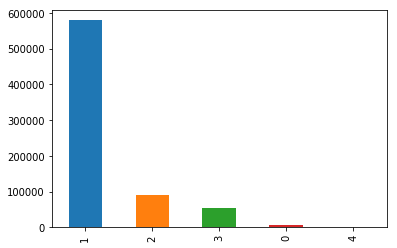

In [25]:
data.BOARD.value_counts().plot(kind='bar')

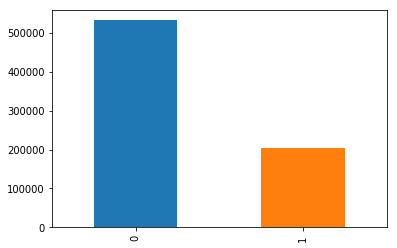

In [26]:
data.CATEGORY.value_counts().plot(kind='bar')

In [27]:
data.shape

(734402, 6)

In [28]:
data_length = (data['TITLE'] + " " + data['CONTENT']).apply(len)
data_length.head()

0    524
1    524
2    127
3    528
4    434
dtype: int64

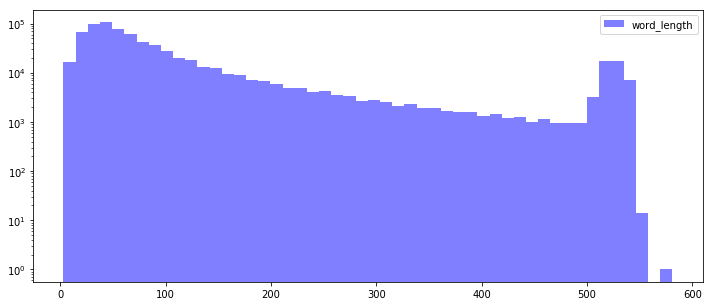

In [29]:
plt.figure(figsize=(12,5))
plt.hist(data_length, bins = 50, alpha=0.5, color = 'b', label='word_length')
plt.yscale('log')

plt.legend()
plt.show()

In [30]:
print("길이 최소 값 : ", np.min(data_length))
print("길이 최대 값 : ", np.max(data_length))
print("길이 평균 값 : ", np.mean(data_length))

길이 최소 값 :  3
길이 최대 값 :  581
길이 평균 값 :  113.17477621248308


In [31]:
data_tok.head()

,NO,CONTENT_TOK,CATEGORY
0,1,바다 찌낚 미야케 지마 조행 스압 바다 찌낚 미야케 지마 조행 내용 짧 .. 편의 ...,1
1,2,나 왜 여기 결혼식 후기 예전 남 다 똑같 결혼식 싫 분위기 예식장 하우스 웨딩 소...,1
2,3,초스압 데이터 주의 년 전 만화 출판 형식 작업 해서 웹 느낌 많이 다르 시간 조금...,0
3,4,씹 스압 바린 일본 투어 편 https 편 https 편 https 편 https ...,1
4,5,자작 드래곤볼 여 캐 댄스 커버 자작 드래곤볼 여 캐 댄스 커버 오랜만 다음 영상 ...,0


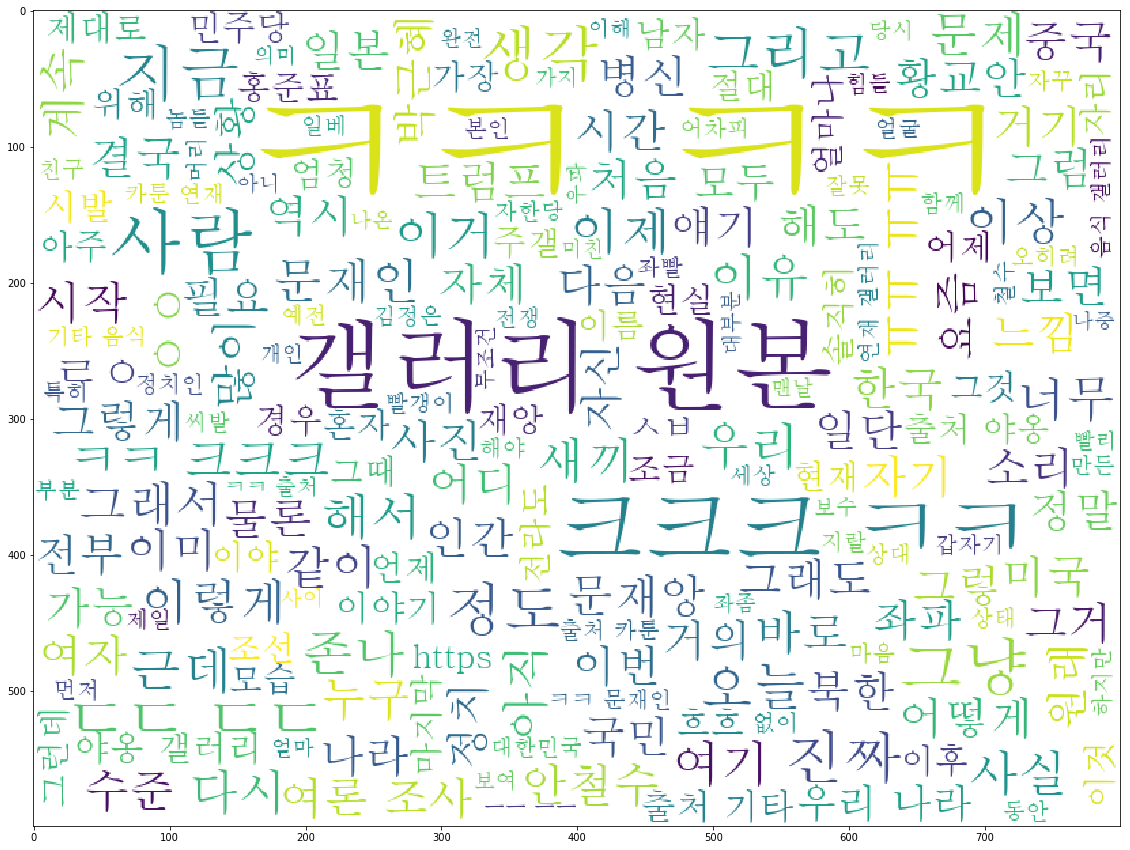

In [36]:
cloud = WordCloud(width = 800, height = 600, font_path = 'C:\Windows\Fonts\\batang.ttc', background_color= 'white').generate(" ".join(data_tok['CONTENT_TOK']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.show()